<a href="https://colab.research.google.com/github/uyenvybuile1502/homeworkfuzzy/blob/main/bai5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.8 MB/s eta 0:00:00


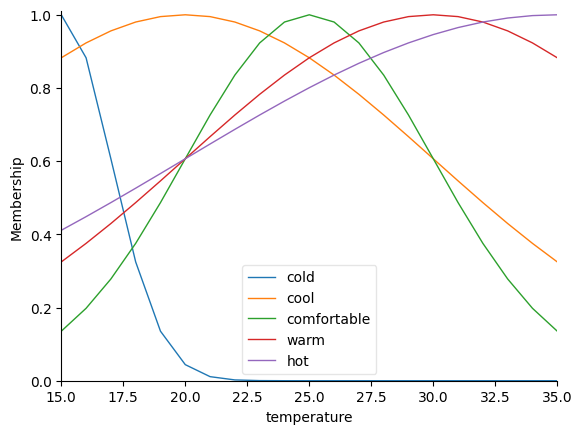

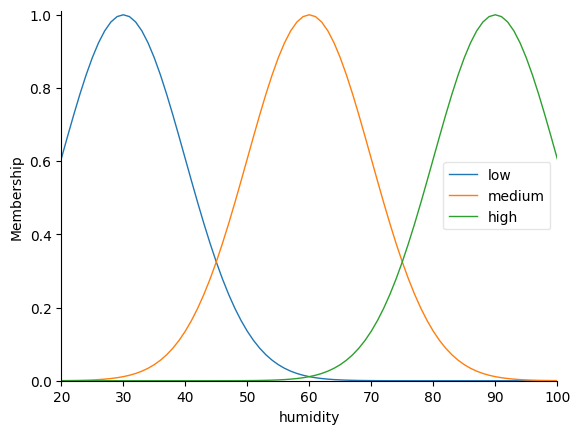

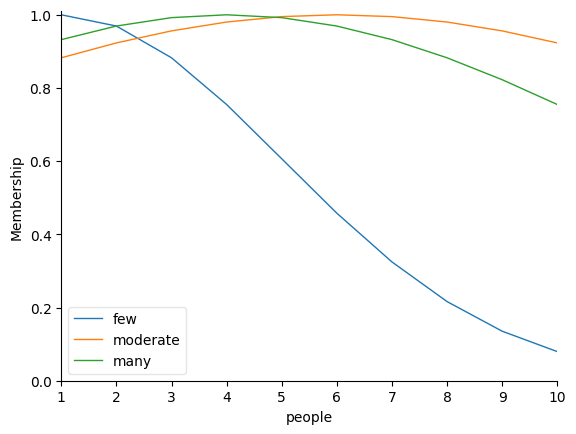

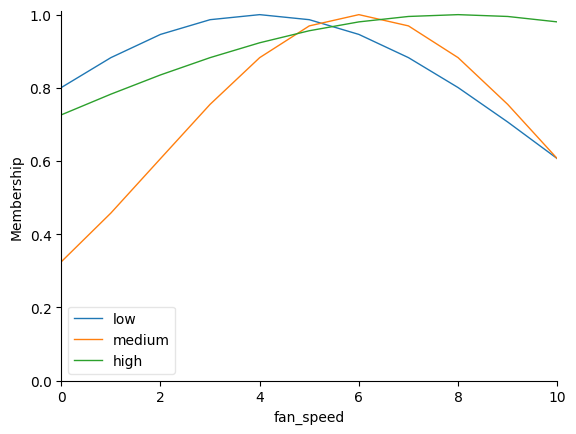

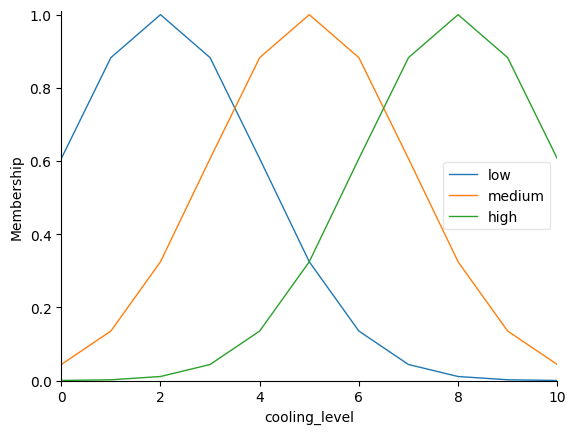

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(15, 36, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(1, 11, 1), 'people')

fan_speed = ctrl.Consequent(np.arange(0, 11, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 11, 1), 'cooling_level')

temperature['cold'] = fuzz.gaussmf(temperature.universe, 15,2)
temperature['cool'] = fuzz.gaussmf(temperature.universe, 20, 10)
temperature['comfortable'] = fuzz.gaussmf(temperature.universe, 25, 5)
temperature['warm'] = fuzz.gaussmf(temperature.universe, 30, 10)
temperature['hot'] = fuzz.gaussmf(temperature.universe, 35, 15)

humidity['low'] = fuzz.gaussmf(humidity.universe, 30, 10)
humidity['medium'] = fuzz.gaussmf(humidity.universe, 60, 10)
humidity['high'] = fuzz.gaussmf(humidity.universe, 90, 10)

people['few'] = fuzz.gaussmf(people.universe, 1, 4)
people['moderate'] = fuzz.gaussmf(people.universe, 6, 10)
people['many'] = fuzz.gaussmf(people.universe, 4, 8)

fan_speed['low'] = fuzz.gaussmf(fan_speed.universe, 4, 6)
fan_speed['medium'] = fuzz.gaussmf(fan_speed.universe, 6, 4)
fan_speed['high'] = fuzz.gaussmf(fan_speed.universe, 8, 10 )

cooling_level['low'] = fuzz.gaussmf(cooling_level.universe, 2, 2)
cooling_level['medium'] = fuzz.gaussmf(cooling_level.universe, 5, 2)
cooling_level['high'] = fuzz.gaussmf(cooling_level.universe, 8, 2)


rule1 = ctrl.Rule(temperature['cold'], (fan_speed['low'], cooling_level['low']))
rule2 = ctrl.Rule(temperature['cool'], (fan_speed['low'], cooling_level['low']))
rule3 = ctrl.Rule(temperature['comfortable'], (fan_speed['medium'], cooling_level['medium']))
rule4 = ctrl.Rule(temperature['warm'], (fan_speed['high'], cooling_level['high']))
rule5 = ctrl.Rule(temperature['hot'], (fan_speed['high'], cooling_level['high']))

rule6 = ctrl.Rule(humidity['low'], cooling_level['low'])
rule7 = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule8 = ctrl.Rule(humidity['high'], cooling_level['high'])

rule9 = ctrl.Rule(people['few'], fan_speed['low'])
rule10 = ctrl.Rule(people['moderate'], fan_speed['medium'])
rule11 = ctrl.Rule(people['many'], fan_speed['high'])

rule12 = ctrl.Rule(temperature['hot'] & humidity['high'] & people['many'],
                   (fan_speed['high'], cooling_level['high']))

rule13 = ctrl.Rule(temperature['comfortable'] & humidity['medium'] & people['moderate'],
                   (fan_speed['medium'], cooling_level['medium']))

rule14 = ctrl.Rule(temperature['cool'] & humidity['low'] & people['few'],
                   (fan_speed['low'], cooling_level['low']))


ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])

ac_simulation = ctrl.ControlSystemSimulation(ac_ctrl)

temperature.view()
humidity.view()
people.view()

fan_speed.view()
cooling_level.view()